In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('./data/microsoft.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [9]:
df['logReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786


In [10]:
mu = df['logReturn'].mean()
sigma = df['logReturn'].std(ddof = 1)
print(mu,sigma)

0.0008202314861230223 0.014191897388737506


In [11]:
density = pd.DataFrame()
density['x'] = np.arange((df['logReturn'].min() - 0.01), 
                         (df['logReturn'].max() + 0.01), 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)
density.head()

,x,pdf
0,-0.107099,7.805370e-12
1,-0.106099,1.330508e-11
2,-0.105099,2.256760e-11
3,-0.104099,3.808878e-11
4,-0.103099,6.396646e-11


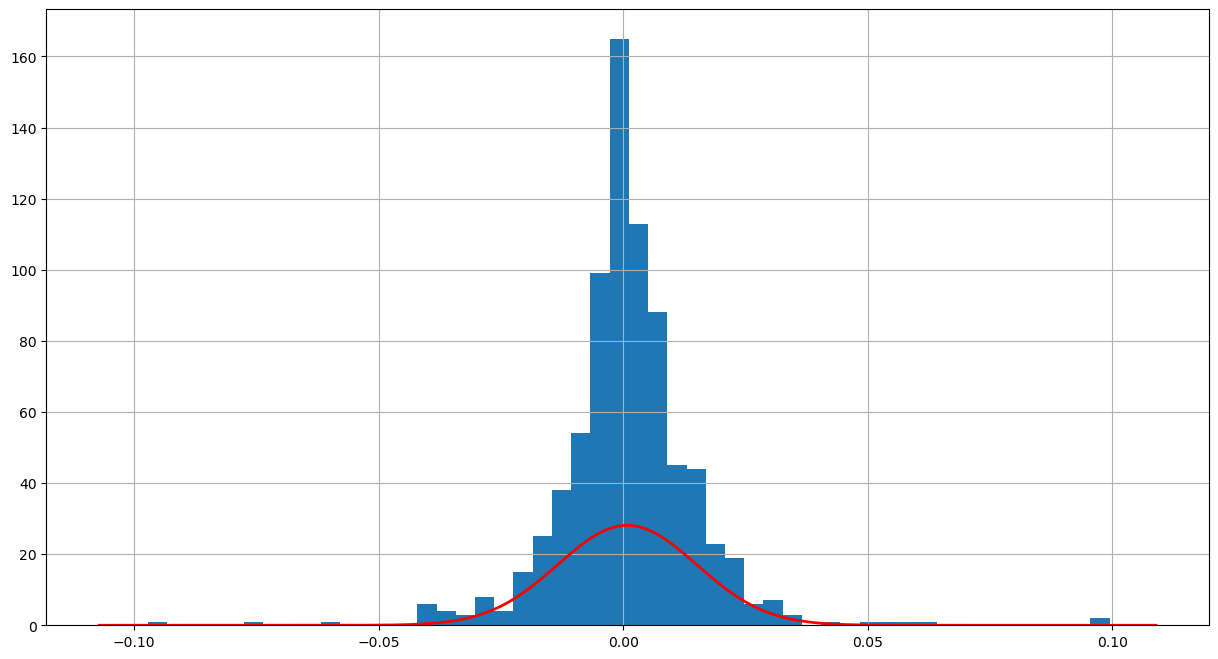

In [21]:
df['logReturn'].hist(bins = 50, figsize = (15,8))
plt.plot(density['x'], density['pdf'], color = 'red', lw = 2)
plt.show()

#### Calculate the probability of the stock price will drop over a certain percentage in a day

In [24]:
prob_return5 = norm.cdf(-0.05, mu, sigma)
print(f"The Probability of a return less than -5% is {prob_return1:.4%}")

The Probability of a return less than -5% is 0.0171%


In [28]:
prob_return10 = norm.cdf(-0.1, mu, sigma)
print(f"The Probability of a return less than -10% is {prob_return10}")

The Probability of a return less than -10% is 6.056775634858521e-13


#### Calculate the probability of the stock price will drop over a certain percentage in a year

In [31]:
mu220 = 220 * mu
sigma220 = (220 ** 0.5) * sigma
prob_return_220 = norm.cdf(-0.4, mu220, sigma220)
print(f"The Probability of a return less than -40% in 220 days is {prob_return_220}")

The Probability of a return less than -40% in 220 days is 0.002912363313330548


In [35]:
mu220 = 220 * mu
sigma220 = np.sqrt(220) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print(f" The Probability of a return less than -20% in 220 days is {drop20}")

 The Probability of a return less than -20% in 220 days is 0.03535237727490905


#### Calculate Value at risk (VaR)

In [36]:
var = norm.ppf(0.05, mu, sigma)
print(f"Single day VaR at 95% confidence is {var}")

Single day VaR at 95% confidence is -0.022523362407065


In [37]:
# Quantile
# 5% quantile
print(f"5% quantile is {norm.ppf(0.05, mu, sigma)}")
# 95% quantile
print(f"95% quantile is {norm.ppf(0.95, mu, sigma)}")

5% quantile is -0.022523362407065
95% quantile is 0.024163825379311034


In [39]:
q25 = norm.ppf(0.25, mu, sigma)
print(f"25% quantile is {q25}")
q75 = norm.ppf(0.75, mu, sigma)
print(f"75% quantile is {q75}")

25% quantile is -0.008752057838414963
75% quantile is 0.010392520810661006
